<h1> Homework 1 </h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.preprocessing import normalize
from sklearn import grid_search
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Preprocessing the data</h2>

In [2]:
wine=pd.read_csv("winequality-red.csv", sep=';')

#Seperating X and y, and normalizing X
X=wine.drop('quality', 1)
X=(X-X.mean())/(X.std())

y=wine['quality']

print('The sklearn functions automatically add the constant term while modeling')
X.head()

The sklearn functions automatically add the constant term while modeling


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


<h1> OLS </h1>

In [3]:
ols=linear_model.LinearRegression()
ols.fit(X,y)

#Cross-validation
scores=np.absolute(cross_validation.cross_val_score(ols,X,y,scoring='mean_squared_error',cv=10))
print('The average MSE is {}'.format(scores.mean()))

The average MSE is 0.43518490403


In [4]:
#Showing coefficients of the model
coefficients=pd.DataFrame({'Features':X.columns, 'Coeff':ols.coef_})
print('The coefficients are:')
coefficients.loc[len(coefficients)]=[ols.intercept_,'Intercept']

coefficients.head(20)

The coefficients are:


,Coeff,Features
0,0.043511,fixed acidity
1,-0.194027,volatile acidity
2,-0.035564,citric acid
3,0.023026,residual sugar
4,-0.088211,chlorides
5,0.045620,free sulfur dioxide
6,-0.107389,total sulfur dioxide
7,-0.033748,density
8,-0.063862,pH
9,0.155325,sulphates


<h1> Ridge Regression </h1>

In [5]:
ridge=linear_model.Ridge()

<h3>Tuning the parameters</h3>

[]

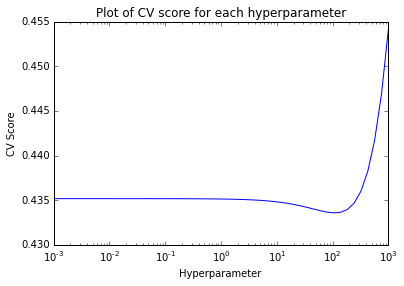

In [6]:
alphas = np.logspace(-3, 3, 50)
scores = list()

for alpha in alphas:
    ridge.alpha = alpha
    this_scores = np.absolute(cross_validation.cross_val_score(ridge, X, y, scoring='mean_squared_error', cv=10))
    scores.append(np.mean(this_scores))

plt.plot(alphas,scores)
plt.xlabel('Hyperparameter')
plt.ylabel('CV Score')
plt.title('Plot of CV score for each hyperparameter')
plt.semilogx()

<h3>Best parameters & Minimum Cross-Validation Error</h3>

In [7]:
print('The minimum MSE is obtained for a hyperparameter of {}'.format(alphas[np.argmin(scores)]) + ' where we have a MSE of {}'.format(min(scores)))

The minimum MSE is obtained for a hyperparameter of 104.811313415 where we have a MSE of 0.433594936562


<h3>Getting the coefficients</h3>

In [8]:
ridge=linear_model.Ridge(alphas[np.argmin(scores)])
ridge.fit(X,y)

ridge_coefficients=pd.DataFrame({'Features':X.columns, 'Coeff':ridge.coef_})
print('The coefficients are:')
ridge_coefficients.loc[len(ridge_coefficients)]=[ridge.intercept_,'Intercept']

ridge_coefficients.head(20)

The coefficients are:


,Coeff,Features
0,0.053463,fixed acidity
1,-0.179152,volatile acidity
2,-0.012114,citric acid
3,0.027123,residual sugar
4,-0.084387,chlorides
5,0.037015,free sulfur dioxide
6,-0.099785,total sulfur dioxide
7,-0.055481,density
8,-0.045262,pH
9,0.148556,sulphates


<h3> Showing the reduction in norm of the coefficients </h3>

In [9]:
print('The L2 norm of the coefficients of OLS is {}'.format(np.linalg.norm(coefficients.Coeff)))
print('The L2 norm of the coefficients of Ridge is {}'.format(np.linalg.norm(ridge_coefficients.Coeff)))

The L2 norm of the coefficients of OLS is 5.65185418105
The L2 norm of the coefficients of Ridge is 5.64949428739


<h1> Lasso Regression </h1>

In [10]:
lasso=linear_model.Lasso()

<h3> Tuning the parameters </h3>

[]

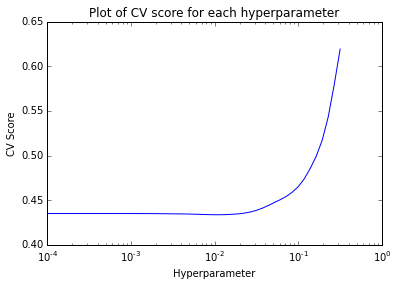

In [11]:
alphas = np.logspace(-4, -0.5, 50)

scores = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = np.absolute(cross_validation.cross_val_score(lasso, X, y,scoring='mean_squared_error',cv=10))
    scores.append(np.mean(this_scores))
    
plt.plot(alphas,scores)
plt.xlabel('Hyperparameter')
plt.ylabel('CV Score')
plt.title('Plot of CV score for each hyperparameter')
plt.semilogx()

<h3>Best parameters & Minimum Cross-Validation Error</h3>

In [12]:
print('The best score is obtained for the following hyperparameter: {}'.format(alphas[np.argmin(scores)]) + ' for which we have a score of {}'.format(min(scores)))

The best score is obtained for the following hyperparameter: 0.0117876863479 for which we have a score of 0.433829272508


<h3>Getting the coefficients</h3>

In [13]:
lasso=linear_model.Lasso(alphas[np.argmin(scores)])
lasso.fit(X,y)

lasso_coefficients=pd.DataFrame({'Features':X.columns, 'Coeff':lasso.coef_})
print('The coefficients are:')
lasso_coefficients.loc[len(lasso_coefficients)]=[lasso.intercept_,'Intercept']

lasso_coefficients.head(20)

The coefficients are:


,Coeff,Features
0,0.000000,fixed acidity
1,-0.184110,volatile acidity
2,-0.000000,citric acid
3,0.000000,residual sugar
4,-0.074653,chlorides
5,0.015188,free sulfur dioxide
6,-0.077324,total sulfur dioxide
7,-0.000000,density
8,-0.053297,pH
9,0.134634,sulphates


- Some coefficients have been set to 0, which makes sense since that's the goal of Lasso Regression.

<h3> Showing the reduction in norm of the coefficients </h3>

In [14]:
print('The L1 norm of the coefficients of OLS is {}'.format(np.linalg.norm(coefficients.Coeff,1)))
print('The L1 norm of the coefficients of Lasso is {}'.format(np.linalg.norm(ridge_coefficients.Coeff,1)))

The L1 norm of the coefficients of OLS is 6.72064120453
The L1 norm of the coefficients of Lasso is 6.64398319115


<h1> Exterior Derivative Estimation </h1>

In [17]:
class ede():
    def __init__(self, lamb, d):
        self.lamb = lamb
        self.d = d
        self.coef_ = None
        
    def fit(self, X, y):
        X_array = X.values
        n, p = X_array.shape
        X_bias = np.concatenate((np.ones((X_array.shape[0], 1)), X_array), axis = 1)

        Cn = X_bias.T.dot(X_bias)/n
        Rn = X_bias.T.dot(y)/n

        S,U=np.linalg.eig(Cn[1:,1:])  
        idx = S.argsort()[::-1]
        S = S[idx]
        U = U[:,idx]

        N_hat=U[:,0:p-self.d-1]
        Pi_x=N_hat.dot(N_hat.T)

        Pn=np.concatenate((np.zeros((1,Pi_x.shape[1])),Pi_x),axis=0)
        Pn = np.concatenate((np.zeros((Pn.shape[0],1)),Pn),axis=1)
        self.coef_ = np.linalg.solve((Cn+self.lamb*Pn),Rn)
        
    def predict(self, X):
        X_array = X.values
        X_bias = np.concatenate((np.ones((X_array.shape[0], 1)), X_array), axis = 1)
        return X_bias.dot(self.coef_.T)
    
    def get_params(self,deep=True):
        return {'lamb': self.lamb, 'd': self.d}
    
    def coef_(self):
        return self.coef_

<h3> Tuning the parameters </h3>

In [19]:
lambdas = np.logspace(-6, 1, 100)
ds = np.arange(1,np.shape(X)[1])

scores = {}

for d in ds:
    for lamb in lambdas:
        ede_model = ede(lamb,d)
        this_scores = np.absolute(cross_validation.cross_val_score(ede_model, X, y,scoring='mean_squared_error',cv=10))
        scores[(lamb,d)]=np.mean(this_scores)
print('finished')

finished


<h3>Best parameters & Minimum Cross-Validation Error</h3>

In [20]:
#Getting the best parameters
best=sorted(scores,key=scores.__getitem__)
print('The best parameters are {}'.format(best[0]))
print('The best MSE is {}'.format(scores[best[0]]))

The best parameters are (0.064280731172843192, 1)
The best MSE is 0.434442683144


<h5> When d=1, plotting the cross-validation error with lambdas</h5>

[]

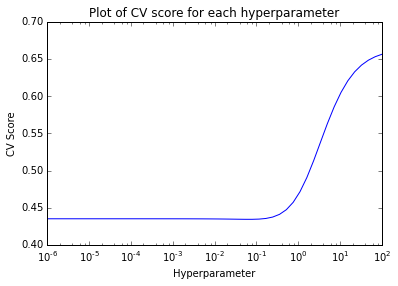

In [21]:
lambdas = np.logspace(-6, 2, 50)

scores = list()

for lamb in lambdas:
    ede_model=ede(lamb,1)
    this_scores = np.absolute(cross_validation.cross_val_score(ede_model, X, y,scoring='mean_squared_error',cv=10))
    scores.append(np.mean(this_scores))
    
plt.plot(lambdas,scores)
plt.xlabel('Hyperparameter')
plt.ylabel('CV Score')
plt.title('Plot of CV score for each hyperparameter')
plt.semilogx()

<h3>Getting the coefficients </h3>

In [22]:
ede_model=ede(best[0][0],best[0][1])

In [23]:
ede_model.fit(X,y)

In [24]:
ede_coefficients=pd.DataFrame({'Features':X.columns, 'Coeff':ede_model.coef_[1:]})
print('The coefficients are:')
ede_coefficients.loc[len(ede_coefficients)]=[ede_model.coef_[0],'Intercept']
ede_coefficients

The coefficients are:


,Coeff,Features
0,0.038135,fixed acidity
1,-0.188512,volatile acidity
2,-0.025464,citric acid
3,0.018635,residual sugar
4,-0.080859,chlorides
5,0.032739,free sulfur dioxide
6,-0.093056,total sulfur dioxide
7,-0.030301,density
8,-0.056651,pH
9,0.143593,sulphates
